---

## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2020

---

* Estudiante: **Valeria Viales Vega**
* Carné: **B67709**
* Grupo: **1**


# `P5` - Análisis y predicción del consumo diario de energía




In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

def energia_diaria(archivo_json):
    '''Importa la base de datos completa y devuelve
    un vector con la energía diaria, en MWh.
    
    :param archivo_json: el contenedor con datos crudos
    :return: el vector de energía diaria
    '''
    # Cargar el "DataFrame"
    df = pd.read_json(archivo_json) 

    # Convertir en un array de NumPy
    datos = np.array(df)  

    # Crear vector con todos los valores horarios de demanda
    demanda = []

    # Extraer la magnitud de la demanda para todas las horas
    for hora in range(len(datos)):
        demanda.append(datos[hora][0]['MW'])

    # Separar las magnitudes en grupos de 24 (24 h)
    demanda = np.split(np.array(demanda), len(demanda) / 24)

    # Crear vector para almacenar la energía a partir de la demanda
    energia = []

    # Calcular la energía diaria por la regla del trapecio
    for dia in range(len(demanda)):
        E = round(np.trapz(demanda[dia]), 2)
        energia.append(E)

    return energia 

In [6]:
import numpy as np

def definicion_estados(vector_energia, estados):
    '''Una función que se encarga de retornar
    los límites del rango de energía para
    una cantidad arbitraria de estados sobre 
    la base del vector de energía.
    
    :param energia: vector de energía diaria
    :param estados: el número de estados
    :return: el vector de estados
    '''
    
    minimo = np.min(vector_energia)
    maximo = np.max(vector_energia)
    segmento = (maximo - minimo)/estados
    vector_estados = np.empty(len(vector_energia))
    
    for i, dia in enumerate(vector_energia):
        diferencia = dia - minimo
        proporcion = diferencia // segmento
        vector_estados[i] = proporcion + 1
        
    return vector_estados

In [7]:
import numpy as np

def probabilidad_transicion(vector_estados, numero_estados, presente, futuro):
    '''Una función que se encarga de calcular
    la probabilidad de ocurrencia de la transición
    entre un estado inicial 'i' y un estado futuro 'j'.
    
    :param vector_estados: el vector con los todos los estados
    :param presente: el número del estado presente
    :param futuro: el número del estado futuro
    :return: la probabilidad de transición
    '''
    
    # Recorrer el vector_estados
    ocurrencias_i = 0
    ocurrencias_i_j = 0
    for i, estado in enumerate(vector_estados[0:-1]):
        if estado == presente:
            ocurrencias_i += 1
            if vector_estados[i+1] == futuro:
                ocurrencias_i_j += 1
    
    # Cálculo de la probabilidad
    probabilidad = ocurrencias_i_j / ocurrencias_i
    
    return probabilidad

[ 1.  6.  7.  8.  7.  3.  7.  8.  8.  7.  8.  6.  3.  7.  8.  8.  8.  8.
  7.  4.  8.  8.  8.  9.  9.  7.  4.  9.  9.  9.  9.  8.  7.  4.  8.  9.
  9.  9.  9.  6.  4.  8.  9. 10. 10.  9.  8.  5.  9. 10. 10. 10. 10.  8.
  5.  8.  8.  9.  9.  9.  7.  4.  8.  9.  9.  9.  9.  7.  5.  9. 10. 10.
 10. 10.  8.  5.  9. 10. 10. 10.  9.  7.  5.  9. 10.  9. 10. 10.  8.  5.
 10. 10. 10. 10.  9.  7.  5.  9. 10. 10.  8. 10.  9.  6. 10.  9.  8.  4.
  2.  4.  3.  8.  9. 10. 10. 11.  9.  6. 10. 10.  7. 10. 10.  8.  6. 10.
 10. 10.  9.  9.  7.  5.  9. 10. 10.  9.  9.  7.  4.  8.  9.  8.  9.  8.
  6.  4.  7.  8.  8.  8.  8.  6.  4.  9.  9.  9.  9.  9.  7.  4.  8.  8.
  8.  8.  8.  7.  4.  9. 10. 10.  9.  9.  7.  4.  8.  9.  8.  8.  8.  6.
  4.  7.  8.  8.  8.  8.  6.  4.  7.  8.  8.  8.  8.  6.  3.  7.  8.  9.
  8.  8.  7.  5.  8.  9.  8.  5.  7.  5.  4.  8.  9.  9.  9.  7.  6.  3.
  8.  9.  8.  8.  8.  6.  4.  7.  8.  7.  2.  6.  6.  3.  7.  8.  8.  8.
  8.  7.  4.  8.  9.  9.  8.  8.  6.  4.  8.  8.  8

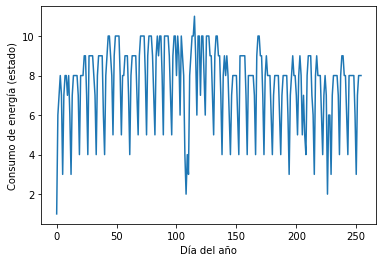

Pi_ij = 0.24324324324324326


In [8]:
import matplotlib.pyplot as plt

# Importar los datos y calcular la energía diaria
vector_energia = energia_diaria('demanda_2019.json')

# Definir los estados
numero_estados = 10
vector_estados = definicion_estados(vector_energia, numero_estados)
print(vector_estados)

# Graficar la evolución de los estados
plt.plot(vector_estados)
plt.xlabel('Día del año')
plt.ylabel('Consumo de energía (estado)')
plt.show()

# Definir la probabilidad de transición de "i" a "j"
i, j = 10, 9
Pi_ij = probabilidad_transicion(vector_estados, numero_estados, i, j)
print('Pi_ij =', Pi_ij)

---
## 4. - Asignaciones del proyecto

### Asignación de parámetros

Las asignaciones requieren de valores de $t$, $i$, $j$ asignados según carné. 

In [9]:
from numpy import random
from scipy import stats

def parametros_asignados(digitos):
    '''Elige un valor t aleatoriamente,
    dos estados arbitrarios i y j
    '''
    
    random.seed(digitos)
    estados = [i+1 for i in range(10)]
    T = stats.expon(2)
    t = int(T.rvs())
    i = estados[random.randint(0, len(estados))]
    j = estados[random.randint(0, len(estados))]
    print('t: {}, i: {}, j: {}'.format(t, i, j))
    return t, i, j

**Ejemplo**: el carné B12345 utiliza los dígitos 12345 y obtiene los parámetros $t$: 4, $i$: 2, $j$: 5.

In [10]:
t, i, j = parametros_asignados(67709)

t: 2, i: 6, j: 3


### 4.1. - Encuesta del curso

* (30%) Completar la encuesta disponible a partir del lunes 7 de diciembre de 2020.

### 4.2. - Construir la matriz de transición de estados

* (30%) Para los datos dados, crear la matriz de probabilidades de transición de estados, considerando que el rango de valores de energía se divide en $N = 10$ estados, donde $i, j \in \{ 1, \ldots, 10 \}$ son estados particulares.


### 4.3. - Construcción de la matriz de transición de orden *t* predicción

Para los valores obtenidos en `parametros_asignados()`:

* (20%) Construir la matriz de transición de estados de orden $t$.


* (20%) Determinar la probabilidad de estar en el estado $j$, $t$ días después de estar en el estado $i$.


In [13]:
### 4.2. - Construir la matriz de transición de estados

import numpy as np

matriz_proba = np.zeros((11,11))

for i in range(1, 11):
    matriz_proba[0,i] = i
    matriz_proba[i,0] = i

for i in range(1,11):
    for j in range(1,11):
        matriz_proba[i,j] = round(probabilidad_transicion(vector_estados, numero_estados, i, j),1)
        
print(matriz_proba)


### 4.3. - Construcción de la matriz de transición de orden *t* predicción


t, i, j = parametros_asignados(67709)


print ('Matriz de transicion de estados de orden {}:'.format(t))
print(definicion_estados(vector_energia, t))


def probabilidad_j_t_i(vector_estados, numero_estados, i, j, t):
    '''Una función que se encarga de calcular
    la probabilidad de ocurrencia de la transición
    entre un estado inicial 'i' y un estado 'j', 't' dias despues.
    
    :param vector_estados: el vector con los todos los estados
    :param i: el número del estado presente
    :param j: el número del estado futuro
    :param t: dias despues que se debe presentar j.
    :return: la probabilidad de transición
    '''
    
    # Recorrer el vector_estados
    ocurrencias_i = 0
    ocurrencias_j = 0
    for k, estado in enumerate(vector_estados[0:-1]):
        if estado == i:
            ocurrencias_i += 1
            if vector_estados[k+t] == j:
                ocurrencias_j += 1
    
    # Cálculo de la probabilidad
    probabilidad = ocurrencias_j / ocurrencias_i
    
    return probabilidad

numero_estados = 10

P_ = probabilidad_j_t_i(vector_estados, numero_estados, i, j, t)
print('La posibilidad de que se presente un estado j={} luego de t={} dias de presentarse el estado i={} es de: {:.4f}' .format(j, t, i,P_i_t_j))


[[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]
 [ 1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0. ]
 [ 2.   0.   0.   0.   0.5  0.   0.5  0.   0.   0.   0. ]
 [ 3.   0.   0.   0.   0.   0.   0.   0.7  0.3  0.   0. ]
 [ 4.   0.   0.1  0.1  0.   0.   0.   0.2  0.5  0.2  0. ]
 [ 5.   0.   0.   0.   0.1  0.   0.   0.1  0.2  0.5  0.1]
 [ 6.   0.   0.   0.3  0.4  0.   0.1  0.1  0.   0.   0.2]
 [ 7.   0.   0.   0.   0.3  0.2  0.   0.   0.4  0.   0. ]
 [ 8.   0.   0.   0.   0.   0.1  0.1  0.1  0.5  0.2  0. ]
 [ 9.   0.   0.   0.   0.   0.   0.1  0.2  0.2  0.4  0.2]
 [10.   0.   0.   0.   0.   0.   0.   0.   0.1  0.2  0.6]]
t: 2, i: 6, j: 3
Matriz de transicion de estados de orden 2:
[1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 1. 2. 2

---

### Universidad de Costa Rica
#### Facultad de Ingeniería
##### Escuela de Ingeniería Eléctrica

---